In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats
from matplotlib import rcParams

config = {
            "font.family": 'serif',
            "font.size": 12,# 相当于小四大小
            "mathtext.fontset": 'stix',#matplotlib渲染数学字体时使用的字体，和Times New Roman差别不大
            "font.serif": ['Arial'],#['Times New Roman'],#宋体
            'axes.unicode_minus': False # 处理负号，即-号
         }
rcParams.update(config)

In [5]:
# Get training process data
FD,KD,SC = {},{},{}

FD['LSTM_mse'] = np.load('./Step4_DNN-alldata - fig/LSTM_mse.npy',allow_pickle=True).tolist()
FD['LSTM_vmse'] = np.load('./Step4_DNN-alldata - fig/LSTM_vmse.npy',allow_pickle=True).tolist()
FD['Transformer_mse'] = np.load('./Step4_DNN-alldata - fig/ATT_mse.npy',allow_pickle=True).tolist()
FD['Transformer_vmse'] = np.load('./Step4_DNN-alldata - fig/ATT_vmse.npy',allow_pickle=True).tolist()
FD['XGB_mse'] = np.load('./Step4_DNN-alldata - fig/XGBoost_mse.npy',allow_pickle=True).tolist()
FD['XGB_vmse'] = np.load('./Step4_DNN-alldata - fig/XGBoost_vmse.npy',allow_pickle=True).tolist()

KD['LSTM_mse'] = np.load('./Step4_DNN-augdata - fig/LSTM_mse.npy',allow_pickle=True).tolist()
KD['LSTM_vmse'] = np.load('./Step4_DNN-augdata - fig/LSTM_vmse.npy',allow_pickle=True).tolist()
KD['Transformer_mse'] = np.load('./Step4_DNN-augdata - fig/ATT_mse.npy',allow_pickle=True).tolist()
KD['Transformer_vmse'] = np.load('./Step4_DNN-augdata - fig/ATT_vmse.npy',allow_pickle=True).tolist()
KD['XGB_mse'] = np.load('./Step4_DNN-augdata - fig/XGBoost_mse.npy',allow_pickle=True).tolist()
KD['XGB_vmse'] = np.load('./Step4_DNN-augdata - fig/XGBoost_vmse.npy',allow_pickle=True).tolist()

SC['LSTM_mse'] = np.load('./Step4_DNN-scenariodata - fig/LSTM_mse.npy',allow_pickle=True).tolist()
SC['LSTM_vmse'] = np.load('./Step4_DNN-scenariodata - fig/LSTM_vmse.npy',allow_pickle=True).tolist()
SC['Transformer_mse'] = np.load('./Step4_DNN-scenariodata - fig/ATT_mse.npy',allow_pickle=True).tolist()
SC['Transformer_vmse'] = np.load('./Step4_DNN-scenariodata - fig/ATT_vmse.npy',allow_pickle=True).tolist()
SC['XGB_mse'] = np.load('./Step4_DNN-scenariodata - fig/XGBoost_mse.npy',allow_pickle=True).tolist()
SC['XGB_vmse'] = np.load('./Step4_DNN-scenariodata - fig/XGBoost_vmse.npy',allow_pickle=True).tolist()

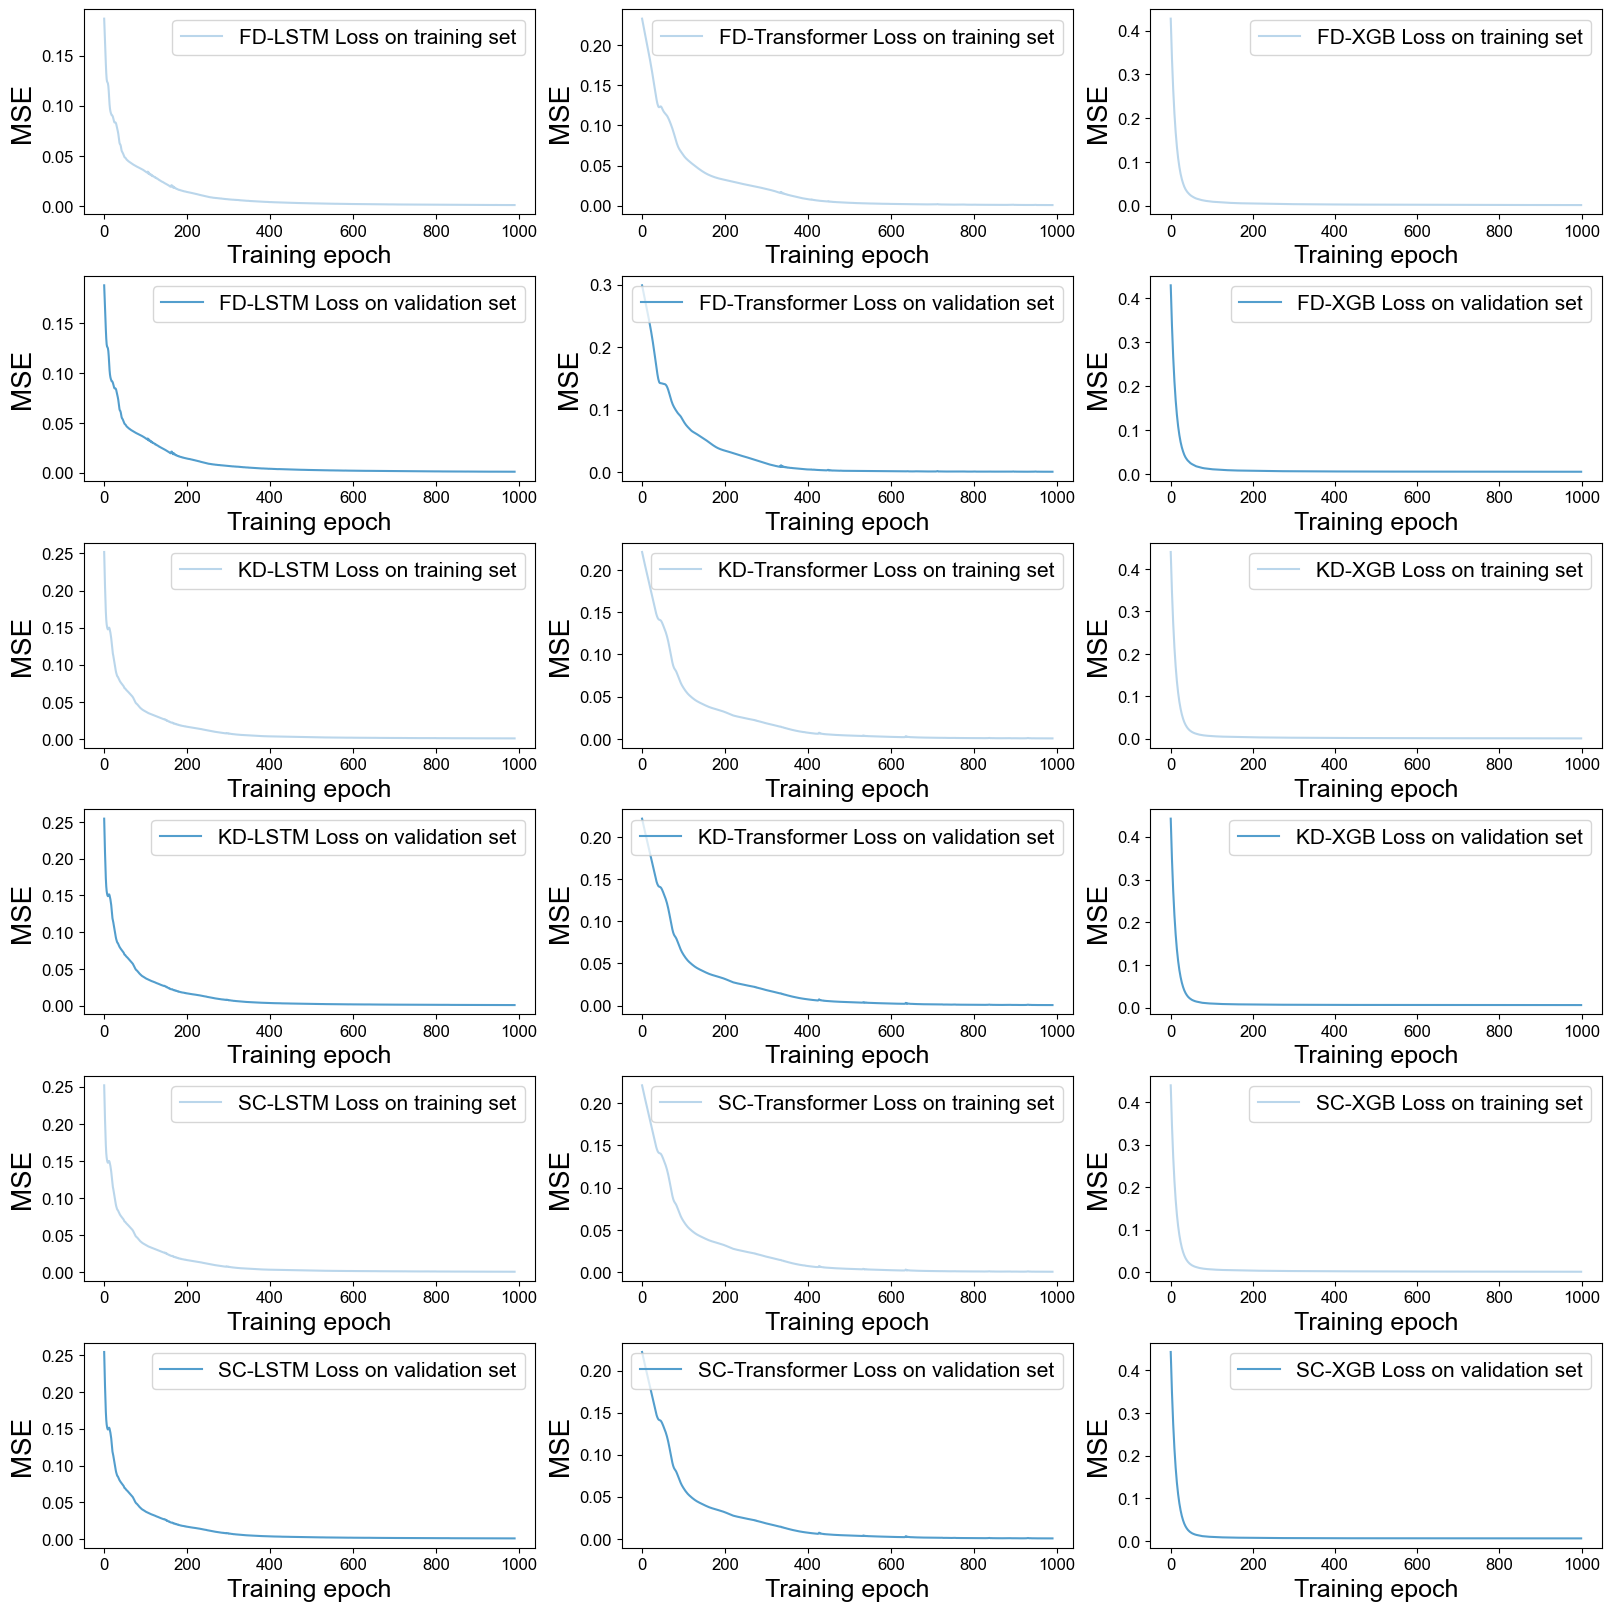

In [7]:
# fig

fig = plt.figure(dpi=100,
                 constrained_layout=True,#类似于tight_layout，使得各子图之间的距离自动调整【类似excel中行宽根据内容自适应】
                 figsize=(16,16)
                )
gs = GridSpec(6, 3, figure=fig)#GridSpec将fiure分为3行3列，每行三个axes，gs为一个matplotlib.gridspec.GridSpec对象，可灵活的切片figure

size=10

alphas = [1,1,1,1]
colors = ['#015482', '#61DE45', '#DEA13A', '#ff474c']#'#DE66C2''#5096DE'
colormap = plt.get_cmap('Blues')
colors   = colormap(np.linspace(0, 2, 8)).tolist() # 按百分比

leg_size = 15
label_size = 20
xlabel_size = 18


for modelname in ['LSTM','Transformer','XGB']:

    if modelname == 'LSTM':
        cow = 0
    elif modelname == 'Transformer':
        cow = 1
    else:
        cow = 2

    ax = fig.add_subplot(gs[0, cow])
    ax.plot(FD[modelname+'_mse'],color=colors[1],alpha=alphas[0],label='FD-'+modelname+' Loss on training set')
    #ax.set_xticks([])
    ax.legend(fontsize=leg_size)
    ax.set_ylabel('MSE',fontsize=label_size)
    ax.set_xlabel('Training epoch',fontsize=xlabel_size)

    ax = fig.add_subplot(gs[1, cow])
    ax.plot(FD[modelname+'_vmse'],color=colors[2],alpha=alphas[1],label='FD-'+modelname+' Loss on validation set')
    #ax.set_xticks([])
    ax.legend(fontsize=leg_size)
    ax.set_ylabel('MSE',fontsize=label_size)
    ax.set_xlabel('Training epoch',fontsize=xlabel_size)

    ax = fig.add_subplot(gs[2, cow])
    ax.plot(KD[modelname+'_mse'],color=colors[1],alpha=alphas[0],label='KD-'+modelname+' Loss on training set')
    #ax.set_xticks([])
    ax.legend(fontsize=leg_size)
    ax.set_ylabel('MSE',fontsize=label_size)
    ax.set_xlabel('Training epoch',fontsize=xlabel_size)

    ax = fig.add_subplot(gs[3, cow])
    ax.plot(KD[modelname+'_vmse'],color=colors[2],alpha=alphas[1],label='KD-'+modelname+' Loss on validation set')
    #ax.set_xticks([])
    ax.legend(fontsize=leg_size)
    ax.set_ylabel('MSE',fontsize=label_size)
    ax.set_xlabel('Training epoch',fontsize=xlabel_size)

    ax = fig.add_subplot(gs[4, cow])
    ax.plot(KD[modelname+'_mse'],color=colors[1],alpha=alphas[0],label='SC-'+modelname+' Loss on training set')
    #ax.set_xticks([])
    ax.legend(fontsize=leg_size)
    ax.set_ylabel('MSE',fontsize=label_size)
    ax.set_xlabel('Training epoch',fontsize=xlabel_size)

    ax = fig.add_subplot(gs[5, cow])
    ax.plot(KD[modelname+'_vmse'],color=colors[2],alpha=alphas[1],label='SC-'+modelname+' Loss on validation set')
    #ax.set_xticks([])
    ax.legend(fontsize=leg_size)
    ax.set_ylabel('MSE',fontsize=label_size)
    ax.set_xlabel('Training epoch',fontsize=xlabel_size)

plt.savefig('./Training_curve.png',dpi=220,bbox_inches='tight')